# Project 1

- Leonardo Meireles Murtha Oliveira : 4182085

In [1]:
# Importing essential libraries for the exercises
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

## 1.
- Consider the following network:
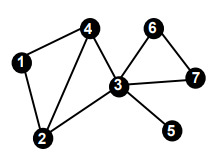


Calculate manually the following measures:

a) Degree distribution:

b) Local clustering coefficient,

c) Transitivity,

d) Distance matrix,

e) Entropy of the degree distribution,

f) Second moment of the degree distribution.

In [2]:
# G1 is the graph for the first exercise
G1 = nx.Graph()

G1.add_edge(1, 2)
G1.add_edge(1, 4)
G1.add_edge(2, 4)
G1.add_edge(2, 3)
G1.add_edge(3, 4)
G1.add_edge(3, 5)
G1.add_edge(3, 6)
G1.add_edge(3, 7)
G1.add_edge(6, 7)

G1 = nx.convert_node_labels_to_integers(G1, first_label=0)

Drawing the network representation

/home/leo/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


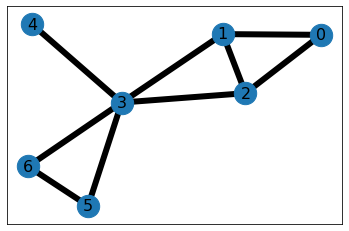

In [3]:
labels = G1.nodes()
pos=nx.spring_layout(G1)
nx.draw_networkx(G1, nodecolor='b', edge_color='black', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edges(G1, pos)
#nx.draw_networkx_edge_labels(G1,pos)
plt.show(True)

#### a) Degree distribution:

For undirected networks the degree distribution can be calculated using $\:P(k) = \frac{v_k}{N}$

In [4]:
def degree_distribution(G):
    """
    Returns : degree k distribution, k values
    """
    # Dict of degrees {node: node_degree}
    vk = np.array([vk[1] for vk in G.degree()])
    
    # max degree in the graph
    max_k = np.max(vk)
    
    # max_k + 1 because it goes from [0, max)
    k_values = np.arange(0, max_k + 1)
    
    # Initializing pk
    pk = np.zeros(max_k + 1)
    
    # Counting the k's
    for k in vk:
        pk[k] += 1
    
    # Degree distribution calculation
    pk_sum = pk.sum()
    pk = pk/pk_sum
    
    return pk, k_values

Plotting the pk with it's normal distribution and the pk in the log scale

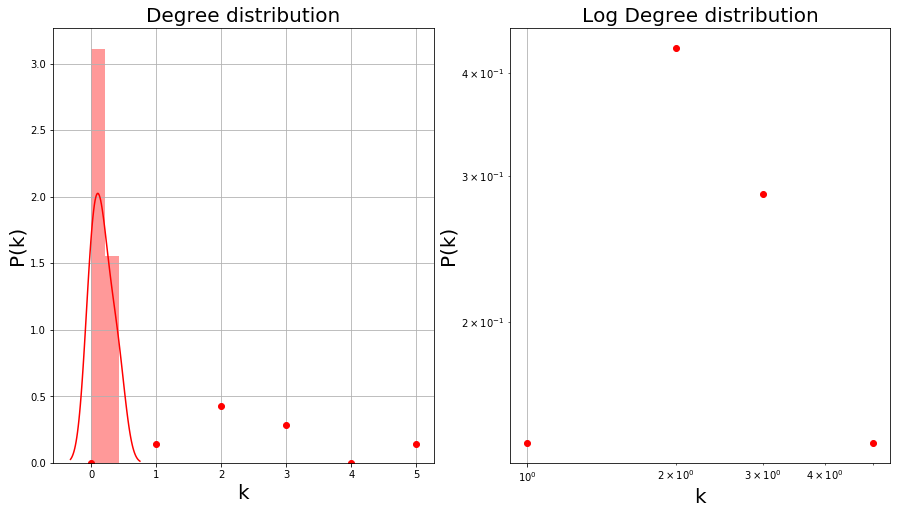

In [5]:
import seaborn as sns
pk, k_values = degree_distribution(G1)
plt.figure(figsize=(15,8))

fig = plt.subplot(1,2,1)
plt.plot(k_values, pk, 'ro')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
# Plotting the distribution
sns.distplot(pk, color='r')
pk, k_values = degree_distribution(G1)

# Plotting with log scale
fig = plt.subplot(1,2,2)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(k_values, pk, 'ro')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Log Degree distribution", fontsize=20)
plt.grid(True)
plt.show(True)

#### b) Local clustering coefficient

$$C_L = \sum{\frac{C_i}{N}}$$

where

$$C_i = \frac{2e_i(\textbf{Number of triangles connected to the node})}{k_i(k_i - i)}$$

NX Clustering:[dict_values([1.0, 0.6666666666666666, 0.6666666666666666, 0.2, 0, 1.0, 1.0])]
Coded Clustering:[[1.0, 0.6666666666666666, 0.6666666666666666, 0.2, 0, 1.0, 1.0]]


/home/leo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


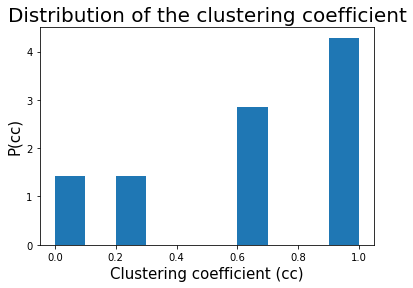

In [6]:
triangles = nx.triangles(G1)
degrees = dict(nx.degree(G1))

C_i = [(2*triangles[node])/(degrees[node]*(degrees[node] - 1)) 
       if degrees[node] > 1 else 0 
       for node in G1.nodes()]

Cl = sum(C_i)/len(G1)
print('NX Clustering:[%s]\nCoded Clustering:[%s]' % (nx.clustering(G1).values(), C_i))

plt.figure()
plt.hist(C_i, bins  = 10, normed=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
#plt.savefig('clustering.eps') #save the figure into a file
plt.show()

#### c) Transitivity
In addition to the degree, another important property of networks is related to the number of triangles, which is related to the concept of transitivity. The transitivity of the network G is calculated as:

In [7]:
T = nx.transitivity(G1)
print('Transitivity = %.3f' % T)

Transitivity = 0.474


#### d) Distance matrix
The distance between pairs of nodes is given by the number of edges between them, where edges and nodes are not repeated. The distance with the minimal length is called the shortest path.

In [8]:
# Getting the biggest component so we don't worry about connections
giant = max(nx.connected_component_subgraphs(G1), key=len)

l = nx.average_shortest_path_length(giant)
print("Average shortest path length:", "%.4f" % l)

Average shortest path length: 1.7143


In [9]:
# The shortest path with the longest length is the diameter
diameter = nx.diameter(giant)
print('Network diameter(longest length shortest path): %d' % diameter)

Network diameter(longest length shortest path): 3


Another measure related to distances is the network efficiency, which is a measure of how efficiently are network exchanges information. The average global efficiency of a graph is the average efficiency of all pairs of nodes. **The higher this measure, the better the information transmission in a network.**

In [10]:
E = nx.global_efficiency(G1)
print('Network eficciency: %.4f' % E)

Network eficciency: 0.6905


And the local efficiency of a node  $i$  characterizes how well information is exchanged by the neighbors of a node  $i$  when it is removed.

In [11]:
leff = nx.local_efficiency(G1)
print('The average local efficiency of the network:', leff)

The average local efficiency of the network: 0.6952380952380953


The matrix of distances stores the distances between all pairs of nodes. From this matrix, we can calculate the distribution of the shortest paths between all pairs of nodes. Notice that  D  is symmetric, because are considering undirected networks.

/home/leo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


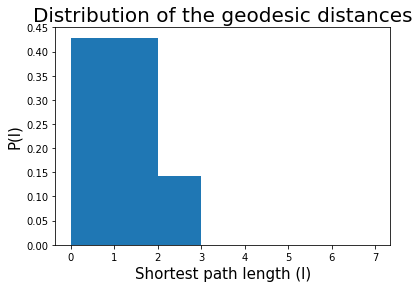

In [12]:
if nx.is_connected(G1):
    vl = []
    N = len(G1)
    D = np.zeros(shape=(N, N))
    # Blubbly sort (O(N^2))
    for i in range(0, N):
        for j in range(i+1, N):
            if(i != j):
                # Shortest path between node i and node j
                # -1 because it takes out counting it sekf
                dij = nx.shortest_path_length(G1, i, j) - 1
                # D is symmetric cause its undirected
                D[i, j] = dij
                D[j, i] = dij
                vl.append(dij)
                
    # Ploting the geodesic distance distribution
    x = range(0,len(G1) + 1)
    plt.hist(vl, bins = x, normed=True)
    plt.title("Distribution of the geodesic distances", fontsize=20)
    plt.ylabel("P(l)", fontsize=15)
    plt.xlabel("Shortest path length (l)", fontsize=15)
    #plt.grid(True)
    #plt.savefig('av_short_path.eps')
    plt.show(True)

else:
    print('The graph has more than one connected component')

#### e) Entropy of the degree distribution,
The Shannon entropy is defined as:

$$H = -\sum_i{pi\log{pi}}$$

In [13]:
import numpy as np

def shannon_entropy(P):
    H = 0 
    
    for pi in P:
        if pi > 0:
            H += pi*np.log(pi)
    
    return -H

In [14]:
P, _ = degree_distribution(G1)

print('Shannon entropy of the degree distribution %.4f: ' % shannon_entropy(P))

Shannon entropy of the degree distribution 1.2770: 


#### f) Second moment of the degree distribution.
The $m_{th}$ moment of distribution can be calculated as:

$$MD(G,m) = \sum_k^n{x_k^mp_k}$$

In [15]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [16]:
print('Second moment of the degree distribution of G1: %s' % (momment_of_degree_distribution(G1, 2)))

Second moment of the degree distribution of G1: 0.7346938775510204


The variance can be calculateds using the momments $V(k) = \langle k^2 \rangle - k^2$.

In [17]:
variance = momment_of_degree_distribution(G1, 2) - momment_of_degree_distribution(G1, 1)**2
print("Variance of the degree = %.4f" % variance)

Variance of the degree = -5.8776


## 2.
- Implement a program to read a directed and weighted network and transform it in an unweighted and undirected network. 
- Consider the network of the characters of Les Miserables1 and the Florida ecosystem wet2 
- Draw the network of the characters on the novel Les Miserables, both weighted and unweighted version.

The weighted version of the graph

/home/leo/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


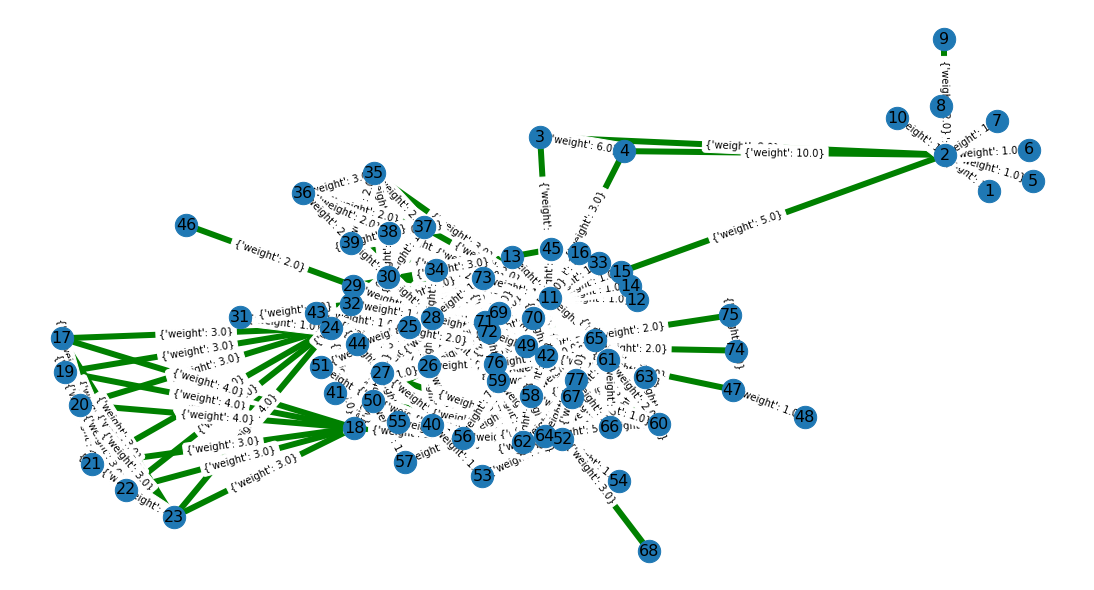

In [18]:
G2 = nx.read_edgelist("nets/lesmis.txt", nodetype=int, data=(('weight',float),))
giant = max(nx.connected_component_subgraphs(G2), key=len)


plt.figure(figsize=(15,8))

labels = giant.nodes()
pos=nx.kamada_kawai_layout(giant)

nx.draw(giant, with_labels = True, nodecolor='r', edge_color='g', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(giant,pos)
plt.show(True)

In [19]:
def to_unweighted(G, min_weight=1):
    GU = nx.Graph()
    for (u,v,w) in G.edges(data=True):
        if w['weight'] >= min_weight :
            GU.add_edge(u, v, weight=1)
    
    return GU

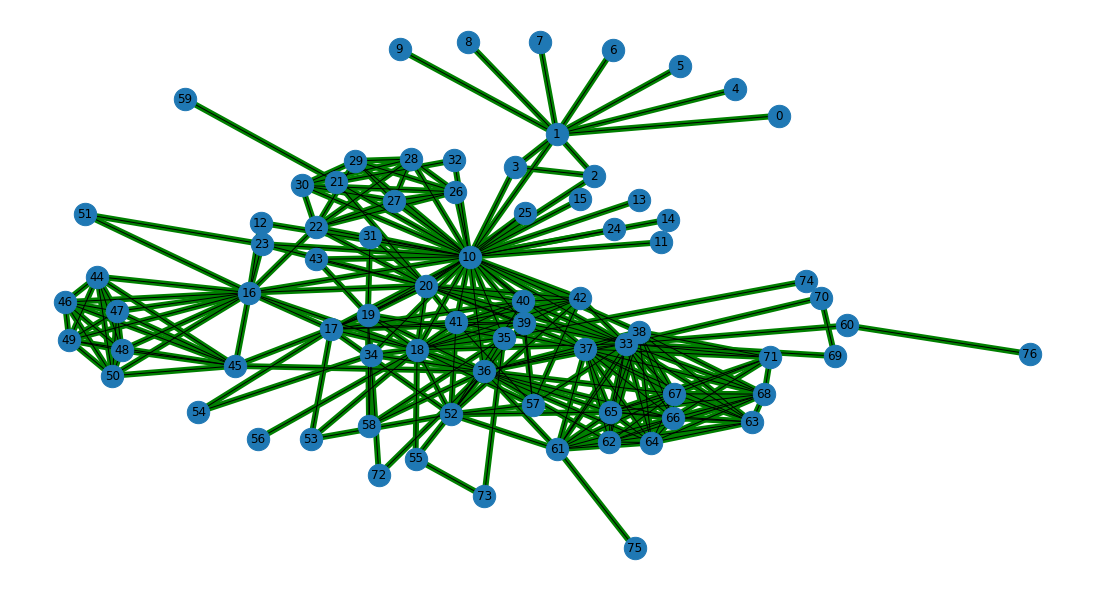

In [20]:
G2U = G2.to_undirected()
G2U = to_unweighted(G2U)
G2U = nx.convert_node_labels_to_integers(G2U, first_label=0)
        
# Getting the biggest component
giant = max(nx.connected_component_subgraphs(G2U), key=len)

plt.figure(figsize=(15,8))
labels = giant.nodes()
pos=nx.kamada_kawai_layout(giant)
nx.draw(giant, nodecolor='green', edge_color='g',
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout

# use default edge labels
nx.draw_networkx(giant,pos)
plt.show(True)

## 3.
Implement a routine to perform a random walk in a network. Consider the unweighted
version of the Les Miserable networks. Does the number of visits to each node correlated with
the degree of each node?

In [21]:
def prob_distribution(G):
    # let networkx return the adjacency matrix A
    A = np.array(nx.adj_matrix(G).todense(), dtype=np.float64)
    dk = dict(G.degree())
    vk = list(dk.values())
    P = np.zeros(A.shape)

    # Creating the probability distribution matrix
    for i in range(len(A)):
        P[i, :] = A[i,:]/vk[i]
    
    return P

In [22]:
dk = dict(G2U.degree())
vk = list(dk.values())
    
# Visited dict
visited = {i: 0 for i in range(0, np.max(vk))}

k_len = 2000

# Calculating the Probability distribution matrix P
P = prob_distribution(G2U)

# Will be starting from the most central node using eigen
centrality = nx.eigenvector_centrality_numpy(G2U)
start = max(centrality, key=centrality.get)
state_vector = P[start, :]


# Then we do p(k) = T dot p(k-1)
# And get the argmax
for k in range(k_len):
    state_vector = np.dot(P, state_vector)
    node = np.argmax(state_vector)
    visited[dk[node]] += 1
    

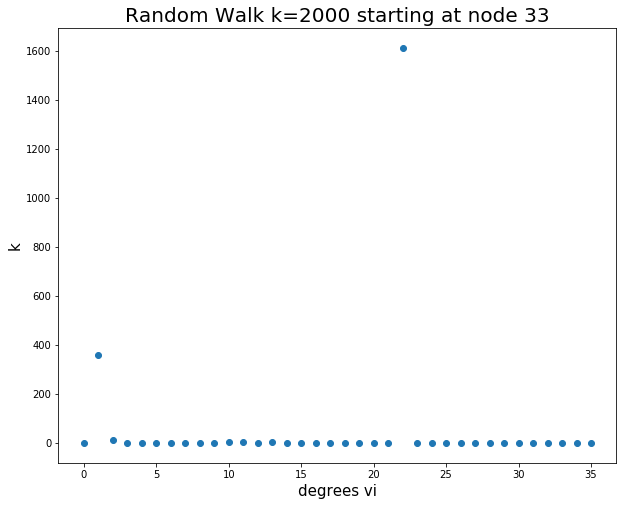

In [23]:
xs = list(visited.keys())
ys = list(visited.values())

plt.figure(figsize=(10,8))
plt.title('Random Walk k=%d starting at node %d' % (k_len, start), fontsize=20)
plt.xlabel('degrees vi', fontsize=15)
plt.ylabel('k', fontsize=15)
plt.scatter(xs, ys, marker = 'o')

There is no actual correlation between the number of connections and the degree of the node.

## 4 .
Using the first network to complete the exercise. 

**a)** The transition probability matrix is defined as $P_{ij} = \frac{Aij}{ki}$. Implement a routine to calculate the powers of the probability matrix. What does it happen when $\lim_{n \to \infty} P^n$? 

That is, you can verify how the elements of the matrix $P^n$ changes as $n$ increases.

In [ ]:
import numpy as np

def random_walk(a, i, iters):
    # a -> adj
    # i -> starting row
    walk = [] # holds transitions
    elements = np.arange(a.shape[0]) # for our graph [0,1,2,3]
    for k in range(iters):
        c_index = i # current index for this iteration
        count = 0 # count of transitions
        while True:
            count+=1
            probs = a[c_index] # probability of transitions
            # sample from probs
            sample = np.random.choice(elements,p=probs) # sample a target using probs
            index = sample # go to target
            if sample == i: # if target is our initial point
                walk.append(count) # stop walking
                break
            
    return walk
  
import matplotlib.pyplot as plt
counts = np.unique(random_walk(P, 33,2000), return_counts=True) # perform 100k walks
plt.bar(counts[0],counts[1])
plt.xticks(np.arange(counts[0][-1]),rotation=-60)
plt.show()

In [ ]:
def matrix_power(M, n):
    MTN = M
    
    for _ in range(n):
        MTN = np.dot(MTN, M)
        
    return MTN

In [ ]:
P_G1 = prob_distribution(G1)

# Using n = 10 to n = 10000
n = 10

while n <= 10000:
    print('First row of P_G1^%d:\n\n%s\n' % (n, matrix_power(P_G1,n)[0, :]))
    n *= n

As $n$ increases the matrix of probability distribuition **converges** to some state.

**b)** Calculate the matrix of distances $D$ for the Les Miserables network. Calculate $A^n$. For $n = 3$, put the values of $A^3$ and $D$ in a scatterplot.  
That is, each point in the scatterplot will be $ ((A_{ij})^3, D_{ij})$, for $i, j = 1, . . . , N$.

In [ ]:
# Getting the distance matrix using Floyd`s algorithm
D = nx.floyd_warshall_numpy(G2U)
A = np.array(nx.adj_matrix(G2U).todense(), dtype=np.float64)
A_3 = matrix_power(A, 3)

N = len(D)

plt.figure(figsize=(12,10))
plt.title('D vs A^3', fontsize=20)
plt.xlabel('Distances', fontsize=15)
plt.ylabel('A^3', fontsize=15)

for i in range(N):
    #print(D[i, :].shape)
    plt.scatter(list(D[i,:]), list(A_3[i,:]), marker = 'o', )

# Not showing the 0 distances because it does not make sense
plt.xlim(left=0.7)
plt.show()

**c)** Verify how the Pearson correlation between $D$ and $P^n$ varies with $n$. More specifically,
construct a scatterplot for $n = 1, 2,$ ... and calculate the correlation for each case. Then, plot the
correlation in function of $n$.

In [ ]:
from scipy.stats.stats import pearsonr

P_G2 = prob_distribution(G2U)

N = len(P_G2)

ns = np.arange(1, 150, 4)
cors = []

for n in ns:
    P_N = matrix_power(P_G2, n)
    x = np.ravel(D)
    y = np.ravel(P_N)
    cor, _ = pearsonr(x, y)
    cors.append(cor)
    
    
plt.figure(figsize=(12,10))
plt.title('D P^N Pearson Correlations', fontsize=20)
plt.xlabel('n', fontsize=15)
plt.ylabel('P-Correlation', fontsize=15)

plt.scatter(ns, cors, marker = 'o', c='r')
plt.show()

It is noticed that as n increases the probability distribution matrix(P_N) and the Distance matrix(D) have more correlation but as soons as P_N reaches a steady state the correlation also stagnate.

## 5 . (Not supposed to do it)

## 6 . 
Determine the cumulative distribution of the degree distribution of the following networks.
Are some networks scale-free? Use only the largest component.

a) E-road network (http://konect.cc/networks/subelj_euroroad),  
b) Facebook user-user friendships (http://snap.stanford.edu/data/egonets-Facebook.html)  
c) A coauthorship network among scientists working on network science, from 2006.  
(http://www-personal.umich.edu/~mejn/netdata/netscience.zip),  
d) Hamsterster friendships  
(http://konect.uni-koblenz.de/networks/petster-friendships-hamster).  

In [ ]:
def plot_dist_cdf(pk, k_values, title):
    plt.figure(figsize=(15,10))
    fig = plt.subplot(2,2,1)
    fig.set_xscale('log')
    fig.set_yscale('log')
    plt.plot(k_values, pk, 'ro')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("%s distribution" % title, fontsize=20)
    #plt.grid(True)

    # Plotting with log scale
    fig = plt.subplot(2,2,2)
    fig.set_xscale('log')
    fig.set_yscale('log')
    plt.plot(k_values, np.cumsum(pk), 'ro')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(x >= k)", fontsize=20)
    plt.title("%s cdf" % title, fontsize=20)
    plt.show(True)

#### a) The E-road network

In [ ]:
# Reading the network
eroad = nx.read_edgelist(path='nets/subelj_euroroad/out.subelj_euroroad_euroroad', comments='%')

eroad = nx.convert_node_labels_to_integers(eroad, first_label=0)
        
# Getting the biggest component
eroad = max(nx.connected_component_subgraphs(eroad), key=len)

In [ ]:
eroad_pk, eroad_k_values = degree_distribution(eroad)

plot_dist_cdf(eroad_pk, eroad_k_values, title='Degree')

#### b) Facebook Net

In [ ]:
fb = nx.read_edgelist(path='nets/fb.edges')
                      
fb = nx.convert_node_labels_to_integers(fb, first_label=0)
        
# Getting the biggest component
fb = max(nx.connected_component_subgraphs(fb), key=len)

In [ ]:
plot_dist_cdf(*(degree_distribution(fb)), title='Degree')

#### c) A coauthorship network among scientists working on network science, from 2006.

In [ ]:
netscience = nx.read_gml(path='nets/netscience.gml')
netscience = nx.convert_node_labels_to_integers(netscience, first_label=0)
netscience = max(nx.connected_component_subgraphs(netscience), key=len)

In [ ]:
plot_dist_cdf(*(degree_distribution(netscience)), title='Degree')

#### d) Hamsterster friendships

In [ ]:
hamster = nx.read_edgelist(path='nets/out.petster-friendships-hamster-uniq', comments='%')
hamster = nx.convert_node_labels_to_integers(hamster, first_label=0)
hamster = max(nx.connected_component_subgraphs(hamster), key=len)

In [ ]:
plot_dist_cdf(*(degree_distribution(hamster)), title='Degree')

# 7 .
Compare the average clustering coefficient (equation ?? ) and the transitivity (equation ??)
of the following networks.

In [ ]:
# Mounting a dict so the table will be easier to make
nets = {'E-road': eroad, 'Facebook': fb, 'Netscience': netscience, 'Hamster': hamster}
# Default table row
data = {'Network': [], 'N(Size)': [], '<k>': [], 'Clustering Coefficient(avg)': [], 
         'Transitivity': [], 'alpha': [], 'H(Shannon)': []}

In [ ]:
import pandas as pd

for name, net in nets.items():
    net_pk, _ = degree_distribution(net)
    data['Network'].append(name)
    data['N(Size)'].append(len(net))
    data['<k>'].append(momment_of_degree_distribution(net, 1))
    data['Clustering Coefficient(avg)'].append(nx.average_clustering(net))
    data['Transitivity'].append(nx.transitivity(net))
    data['alpha'].append(momment_of_degree_distribution(net, 2)/momment_of_degree_distribution(net, 1))
    data['H(Shannon)'].append(shannon_entropy(net_pk))

df_data = pd.DataFrame.from_dict(data)

display(df_data)

## 8 .
Calculate the distribution of the shortest path of the following networks:

In [ ]:
def path_distribution(D):
    # Dict of degrees {node: node_degree}
    vk = np.ravel(D)
    vk = np.array(vk, dtype=int)
    
    # max degree in the graph
    max_k = np.max(vk)
    
    # max_k + 1 because it goes from [0, max)
    k_values = np.arange(0, max_k + 1)
    
    # Initializing pk
    pk = np.zeros(max_k + 1)
    
    # Counting the k's
    for k in vk:
        pk[k] += 1
    
    # Degree distribution calculation
    pk_sum = pk.sum()
    pk = pk/pk_sum
    
    return pk, k_values


In [ ]:
# WILL NOT BE USED
def shortest_path_matrix(G):
    paths = dict(nx.shortest_path_length(G))
    N = len(G)
    SM = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            SM[i][j] = paths[i][j]
    
    return SM

In [ ]:
D2 = nx.floyd_warshall_numpy(G2U)
SM2 = shortest_path_matrix(G2U)

# Checking if is the same matrix
print(np.allclose(D2, SM2))

It's the same matrix so I'll be using the nx method so it is more effiecient

In [ ]:
# Ploting for each net the distribution and cdf

for name, net in nets.items():
    D_net = nx.floyd_warshall_numpy(net)
    plot_dist_cdf(*path_distribution(D_net), title='%s distance' % name)

## 9 .
Construct a table where each row represents the measures of a network.  
And the following measures: (i) number of nodes, (ii) average degree, (iii) second moment of the
degree distribution, (iv) average clustering coefficient, (v) transitivity, (vi) average shortest path
length, (vii) diameter.

In [ ]:
# Default table row
data2 = {'Network': [], 'N(Size)': [], 'Average degree':[], '<k^2>': [], 'Clustering Coefficient(avg)': [], 
         'Transitivity': [], 'Avg Shortest Path Length': [], 'Diameter': [], 'alpha(complexity)': []}

In [ ]:
import pandas as pd

for name, net in nets.items():
    dk = dict(net.degree())
    vk = list(dk.values())
    k2 = momment_of_degree_distribution(net, 2)
    k = momment_of_degree_distribution(net, 1)
    
    data2['Network'].append(name)
    data2['N(Size)'].append(len(net))
    data2['Average degree'].append(np.mean(vk))
    data2['<k^2>'].append(k2)
    data2['Clustering Coefficient(avg)'].append(nx.average_clustering(net))
    data2['Transitivity'].append(nx.transitivity(net))
    data2['Avg Shortest Path Length'].append(nx.average_shortest_path_length(net))
    data2['Diameter'].append(nx.diameter(net))
    data2['alpha(complexity)'].append(k2/k)
    
df_data2 = pd.DataFrame.from_dict(data2)

display(df_data2)

From the results shown in the table above we can say that:

- E-road is the most complex net out of the four with a diameter of 62 and the biggest alpha value.
- Facebook has the biggest average degree(people tend to connect more on social media).
- Netscience is the most clustered net and that might be because scientists tend to have more triangular relationships(eg. (professor, student, mentor))
- Hamster even tough being the biggest net it is quite simpler than the others.

## 10 .
Consider the OSMnx package. Show the networks of the following cities:  
(i) London, (ii) Paris, and (iii) Berlin.  

Determine the degree distribution of these cities and calculate the following measures:  
a) Complexity measure,  
b) Average shortest path length,  
c) Clustering coefficient.  

What can you say about the structure of these networks? Which one is more complex?  
If you want to find a place in one of these cities, which one should be the easiest to navigate?

In [ ]:
import osmnx as ox

cities = ['Paris', 'Berlin', 'London']

net_cities = {city: ox.graph_from_address(city, distance=2000, network_type='drive') for city in cities}

In [ ]:
# Preprocessing the city graphs
for name, net in net_cities.items():
    net = nx.convert_node_labels_to_integers(net, first_label=0)
    net = nx.to_undirected(net)
    net = nx.Graph(net)
    # Getting the biggest component
    net = max(nx.connected_component_subgraphs(net), key=len)
    net_cities[name] = net
    # Saving the network because it takes a long time do download
    nx.write_edgelist(net, path='nets/osmnx_%s.txt' % name)

In [ ]:
import pandas as pd

# Default table row
data_cities = {'Network': [], 'N(Size)': [], '<k>': [], 'Clustering Coefficient(avg)': [], 
         'Transitivity': [], 'alpha(complexity)': [], 'H(Shannon)': [], 'Avg Shortest Path Length': []}

for name, net in net_cities.items():
    net_pk, _ = degree_distribution(net)
    data_cities['Network'].append(name)
    data_cities['N(Size)'].append(len(net))
    data_cities['<k>'].append(momment_of_degree_distribution(net, 1))
    data_cities['Clustering Coefficient(avg)'].append(nx.average_clustering(net))
    data_cities['Transitivity'].append(nx.transitivity(net))
    data_cities['alpha(complexity)'].append(momment_of_degree_distribution(net, 2)/momment_of_degree_distribution(net, 1))
    data_cities['H(Shannon)'].append(shannon_entropy(net_pk))
    data_cities['Avg Shortest Path Length'].append(nx.average_shortest_path_length(net))
    

df_data_cities = pd.DataFrame.from_dict(data_cities)

display(df_data_cities)

Looking at the complexity and average shortest path we can say that London would be hardest one to navigate because it's more complex and the easiest would be Berlin.